In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import joblib
import json
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 맥에서 글씨 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# model load

In [2]:
model = joblib.load('./22/v_22.pkl')

/opt/anaconda3/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.1. Please consider upgrading.
  warnings.warn(


In [3]:
model_params = model.get_params()
print(json.dumps(model_params, indent=4))

{
    "boosting_type": "gbdt",
    "class_weight": null,
    "colsample_bytree": 1.0,
    "importance_type": "split",
    "learning_rate": 0.1,
    "max_depth": -1,
    "min_child_samples": 20,
    "min_child_weight": 0.001,
    "min_split_gain": 0.0,
    "n_estimators": 100000,
    "n_jobs": null,
    "num_leaves": 31,
    "objective": null,
    "random_state": null,
    "reg_alpha": 0.0,
    "reg_lambda": 0.0,
    "subsample": 1.0,
    "subsample_for_bin": 200000,
    "subsample_freq": 0,
    "metric": "rmse",
    "data_sample_strategy": "goss"
}


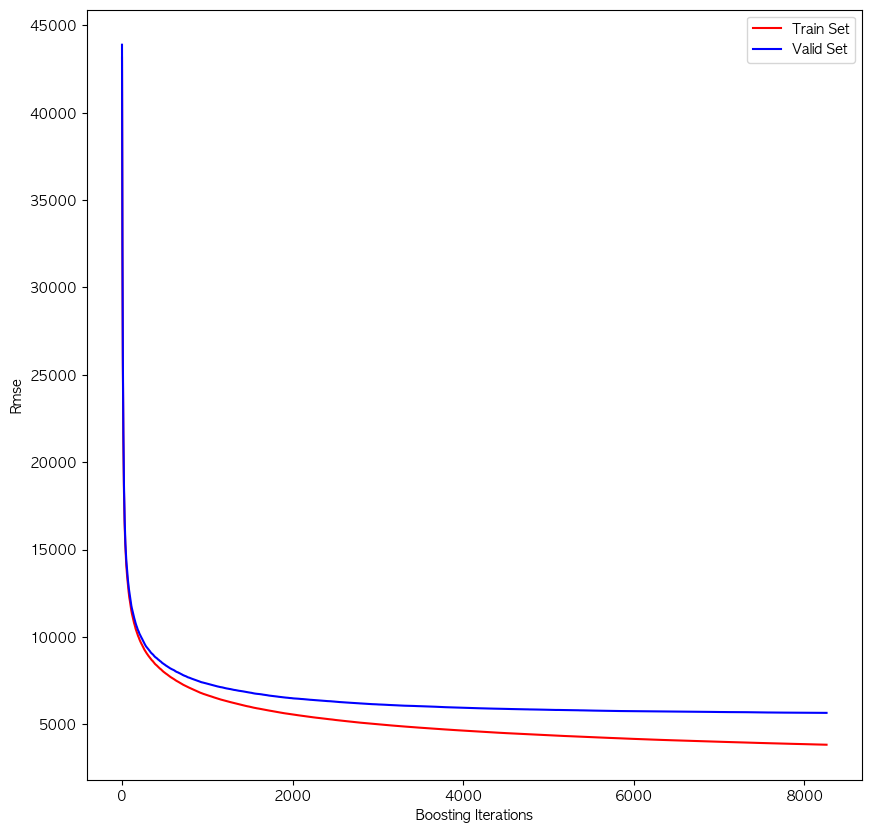

In [4]:
# 학습, 검증 rmse 시각화

plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1)
plt.plot(np.arange(len(list(model.evals_result_['training']['rmse']))), list(model.evals_result_['training']['rmse']), linestyle='-', color='r', label='Train Set')
plt.plot(np.arange(len(list(model.evals_result_['training']['rmse']))), list(model.evals_result_['valid_1']['rmse']), linestyle='-', color='b', label='Valid Set')
plt.legend()
plt.xlabel('Boosting Iterations')
plt.ylabel('Rmse')
plt.show()

In [5]:
# feature importance

features = ['전용면적', '층', '건축년도', '좌표X', '좌표Y', '가장 가까운 거리', '인근 지하철 역 개수', '가장 가까운 버스 정류장 거리', '인근 버스 정류장 개수', '계약년', 'GDP', '한국은행 기준금리', '기대 인플레이션', '거래량', '구별 지가지수', '공시지가 평균', '매수우위지수', '30년이상50년이하', '아파트 카테고리', '지하철 카테고리', '계약월_sin']
       
feat_imp = model.feature_importances_

In [6]:
feat_imp

array([35040, 14984, 17188, 18935, 18800, 18574,  8030, 18809,  9657,
        4010,  2655,  4018,  6086, 10365, 17913, 16781,  9447,   533,
        1015,  8232,  4928], dtype=int32)

In [7]:
model.feature_name_

['전용면적',
 '층',
 '건축년도',
 '좌표X',
 '좌표Y',
 '가장_가까운_거리',
 '인근_지하철_역_개수',
 '가장_가까운_버스_정류장_거리',
 '인근_버스_정류장_개수',
 '계약년',
 'GDP',
 '한국은행_기준금리',
 '기대_인플레이션',
 '거래량',
 '구별_지가지수',
 '공시지가_평균',
 '매수우위지수',
 '30년이상50년이하',
 '아파트_카테고리',
 '지하철_카테고리',
 '계약월_sin']

In [8]:
model.best_score_

defaultdict(collections.OrderedDict,
            {'training': OrderedDict([('rmse', 3842.719051519715)]),
             'valid_1': OrderedDict([('rmse', 5657.607681202788)])})

In [10]:
model.boosting_type

'gbdt'

In [11]:
sorted_feat_imp = pd.Series(feat_imp, features).sort_values(ascending=False)
print(sorted_feat_imp)

전용면적                35040
좌표X                 18935
가장 가까운 버스 정류장 거리    18809
좌표Y                 18800
가장 가까운 거리           18574
구별 지가지수             17913
건축년도                17188
공시지가 평균             16781
층                   14984
거래량                 10365
인근 버스 정류장 개수         9657
매수우위지수               9447
지하철 카테고리             8232
인근 지하철 역 개수          8030
기대 인플레이션             6086
계약월_sin              4928
한국은행 기준금리            4018
계약년                  4010
GDP                  2655
아파트 카테고리             1015
30년이상50년이하            533
dtype: int32


In [13]:
sorted_feat_imp = sorted_feat_imp / sorted_feat_imp.max()
sorted_feat_imp

전용면적                1.000000
좌표X                 0.540382
가장 가까운 버스 정류장 거리    0.536787
좌표Y                 0.536530
가장 가까운 거리           0.530080
구별 지가지수             0.511216
건축년도                0.490525
공시지가 평균             0.478910
층                   0.427626
거래량                 0.295805
인근 버스 정류장 개수        0.275599
매수우위지수              0.269606
지하철 카테고리            0.234932
인근 지하철 역 개수         0.229167
기대 인플레이션            0.173687
계약월_sin             0.140639
한국은행 기준금리           0.114669
계약년                 0.114441
GDP                 0.075771
아파트 카테고리            0.028967
30년이상50년이하          0.015211
dtype: float64

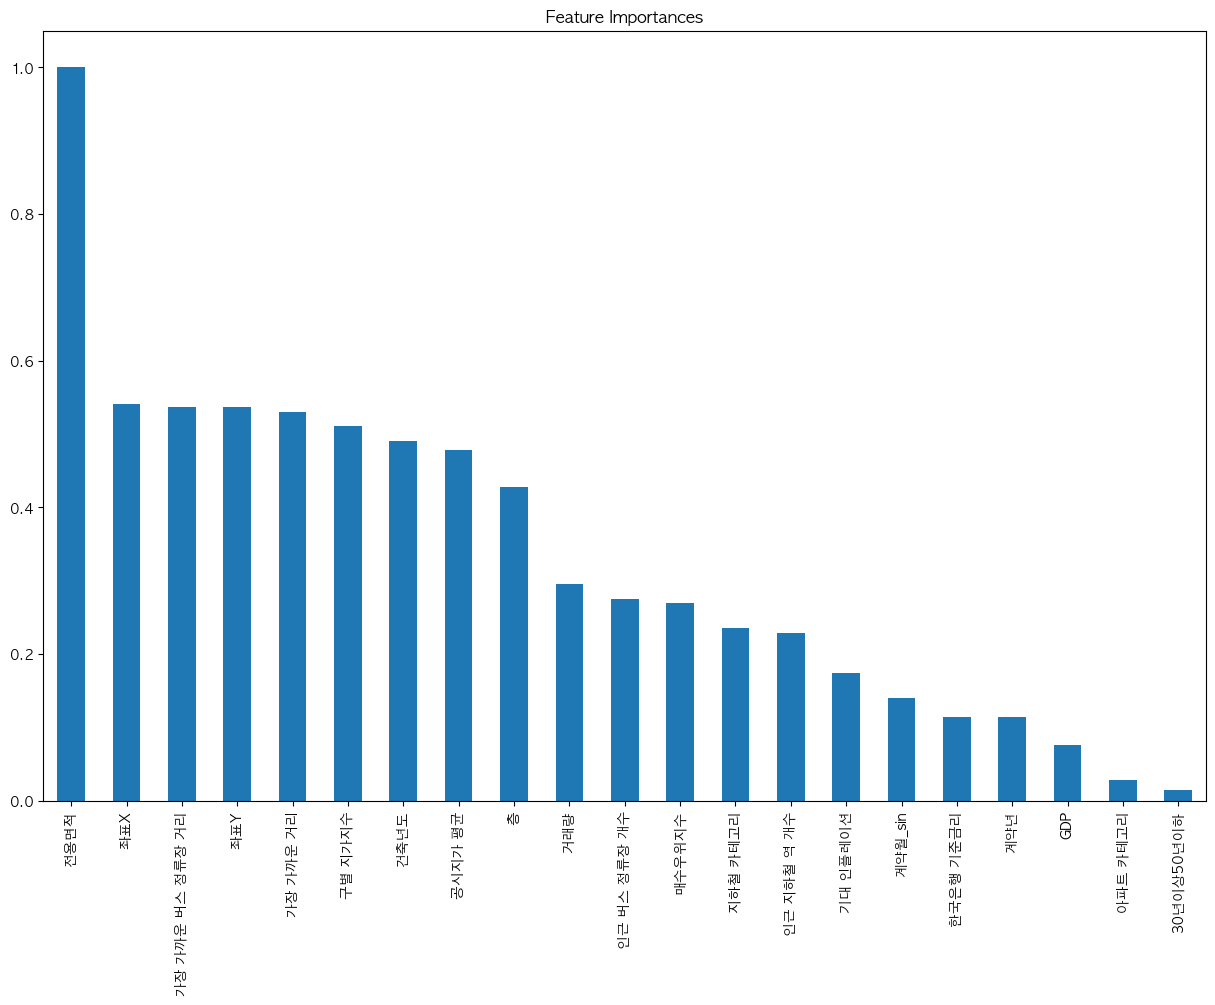

In [14]:
plt.figure(figsize=(15, 10))
sorted_feat_imp.plot(kind='bar', title='Feature Importances')
plt.show()

In [15]:
data = pd.read_csv('../data/preprocessed/22_subway_line.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_833/3473396134.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/preprocessed/22_subway_line.csv')


In [16]:
# 일부 feature 제거 - 기준은 내마음대로

data.drop(['해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호',
         'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수',
         'k-사용검사일-사용승인일', 'k-관리비부과면적', 'k-전용면적별세대현황(60이하)', 'k-전용면적별세대현황(60~85이하)',
         'k-85~135이하', 'k-135초과', 'k-홈페이지', 'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태',
         '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '단지신청일'], axis=1, inplace=True)

# 추가로 제거가 필요한 feature 제거
data.drop(['시군구', '번지', '본번', '부번', '아파트명', '도로명', 'k-관리방식', 'k-건설사(시공사)', 'k-시행사', 'k-연면적', 'k-주거전용면적',
         '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '시군구 번지', '좌표X,좌표Y', 'index', '역사_ID', '역사명', '위도', '경도',
         '가장 가까운 버스 정류장 index', '가장 가까운 버스 정류장 노드 ID', '가장 가까운 버스 정류소번호', '가장 가까운 버스 정류소명',
         '가장 가까운 버스 정류소 타입', '가장 가까운 버스 정류장 X좌표', '가장 가까운 버스 정류장 Y좌표', '동', 
         '구', '호선'], axis=1, inplace=True)

In [17]:
# 계약월 변수 생성

data['계약월'] = data['계약년월'].astype(str).str[4:].astype(int)
data.drop(['계약년월', '계약일'], axis=1, inplace=True)
data['계약월_sin'] = np.sin(2 * np.pi * data['계약월'] / 12)
data.drop(['계약월'], axis=1, inplace=True)

In [18]:
def scailing(col, scaler_type):
    if scaler_type == 'min_max': scaler = MinMaxScaler()
    else : scaler = StandardScaler()

    return scaler.fit_transform(data[[col]])

cols = ['전용면적', '층', '건축년도', '좌표X', '좌표Y', '가장 가까운 거리',
       '인근 지하철 역 개수', '가장 가까운 버스 정류장 거리', '인근 버스 정류장 개수', '계약년', 'GDP',
       '한국은행 기준금리', '기대 인플레이션', '지가지수', '아파트 인허가', '미분양', '거래량',
       '구별 지가지수', '공시지가 평균', '매수우위지수', '건물나이', '구매력지수', '거래활발지수',
       '매매가격 지수 증감률', '매매 대비 전세가격 비율', '계약월_sin']

for col in cols:
    print(col)
    scaler_type = 'min_max'
    if col == '계약월_sin': scaler_type = 'standard'

    data[[col]] = scailing(col, scaler_type)

전용면적
층
건축년도
좌표X
좌표Y
가장 가까운 거리
인근 지하철 역 개수
가장 가까운 버스 정류장 거리
인근 버스 정류장 개수
계약년
GDP
한국은행 기준금리
기대 인플레이션
지가지수
아파트 인허가
미분양
거래량
구별 지가지수
공시지가 평균
매수우위지수
건물나이
구매력지수
거래활발지수
매매가격 지수 증감률
매매 대비 전세가격 비율
계약월_sin


In [19]:
data

,전용면적,층,건축년도,좌표X,좌표Y,target,is_test,가장 가까운 거리,인근 지하철 역 개수,가장 가까운 버스 정류장 거리,...,매수우위지수,건물나이,30년이상50년이하,구매력지수,거래활발지수,매매가격 지수 증감률,매매 대비 전세가격 비율,아파트 카테고리,지하철 카테고리,계약월_sin
0,0.168839,0.095890,0.419355,0.678243,0.167126,124000.0,0,0.353721,0.086957,0.101599,...,0.513427,0.561644,1,0.388295,0.269203,0.526489,0.864178,기타,분당선,-0.022272
1,0.168839,0.109589,0.419355,0.678243,0.167126,123500.0,0,0.353721,0.086957,0.101599,...,0.513427,0.561644,1,0.388295,0.269203,0.526489,0.864178,기타,분당선,-0.022272
2,0.108520,0.123288,0.419355,0.678243,0.167126,91500.0,0,0.353721,0.086957,0.101599,...,0.513427,0.561644,1,0.388295,0.269203,0.526489,0.864178,기타,분당선,-0.022272
3,0.168839,0.109589,0.419355,0.678243,0.167126,130000.0,0,0.353721,0.086957,0.101599,...,0.702685,0.575342,1,0.342458,0.426615,0.639847,0.844200,기타,분당선,0.684200
4,0.168839,0.082192,0.419355,0.678243,0.167126,117000.0,0,0.353721,0.086957,0.101599,...,0.702685,0.575342,1,0.342458,0.426615,0.639847,0.844200,기타,분당선,0.684200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,0.180135,0.232877,0.854839,0.807949,0.728162,NaN,1,0.227756,0.173913,0.097533,...,0.191176,0.273973,0,0.301707,0.187420,0.350729,0.345867,기타,기타,-0.728745
1128090,0.180063,0.219178,0.854839,0.807949,0.728162,NaN,1,0.227756,0.173913,0.097533,...,0.191176,0.273973,0,0.301707,0.187420,0.350729,0.345867,기타,기타,-0.728745
1128091,0.221168,0.219178,0.854839,0.807949,0.728162,NaN,1,0.227756,0.173913,0.097533,...,0.242327,0.273973,0,0.297272,0.206827,0.353863,0.347283,기타,기타,-1.245919
1128092,0.180835,0.301370,0.854839,0.807949,0.728162,NaN,1,0.227756,0.173913,0.097533,...,0.212916,0.273973,0,0.288411,0.262852,0.389469,0.349765,기타,기타,-1.435218


In [20]:
#test_data['30년이상50년이하'] = test_data['30년이상50년이하'].astype('category')
data['아파트 카테고리'] = data['아파트 카테고리'].astype('category')
data['지하철 카테고리'] = data['지하철 카테고리'].astype('category')

In [21]:
data_dropped = data.drop(['지가지수', '아파트 인허가', '미분양', '건설사 랭킹',
                      '건물나이', '구매력지수', '거래활발지수', '매매가격 지수 증감률',
                      '매매 대비 전세가격 비율', 'target',
                      ], axis=1)

data_dropped.columns

Index(['전용면적', '층', '건축년도', '좌표X', '좌표Y', 'is_test', '가장 가까운 거리',
       '인근 지하철 역 개수', '가장 가까운 버스 정류장 거리', '인근 버스 정류장 개수', '계약년', 'GDP',
       '한국은행 기준금리', '기대 인플레이션', '거래량', '구별 지가지수', '공시지가 평균', '매수우위지수',
       '30년이상50년이하', '아파트 카테고리', '지하철 카테고리', '계약월_sin'],
      dtype='object')

In [22]:
test_data = data_dropped[data_dropped['is_test']==1]

In [23]:
test_data.drop(['is_test'], axis=1, inplace=True)
test_data.columns

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_833/1227687209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(['is_test'], axis=1, inplace=True)


Index(['전용면적', '층', '건축년도', '좌표X', '좌표Y', '가장 가까운 거리', '인근 지하철 역 개수',
       '가장 가까운 버스 정류장 거리', '인근 버스 정류장 개수', '계약년', 'GDP', '한국은행 기준금리',
       '기대 인플레이션', '거래량', '구별 지가지수', '공시지가 평균', '매수우위지수', '30년이상50년이하',
       '아파트 카테고리', '지하철 카테고리', '계약월_sin'],
      dtype='object')

In [24]:
preds = model.predict(test_data)
preds

array([191387.21963464, 296127.0195037 , 336273.46222925, ...,
        84859.72550958,  74139.63006278,  73397.52369916])

In [25]:
preds

array([191387.21963464, 296127.0195037 , 336273.46222925, ...,
        84859.72550958,  74139.63006278,  73397.52369916])

In [26]:
v_22_preds = pd.read_csv('../submission/22/output.csv')
v_22_preds

,target
0,191387
1,296127
2,336273
3,287949
4,220455
...,...
9267,75048
9268,74824
9269,86950
9270,74892


# V.30.2 모델 체크

In [9]:
model = joblib.load('./30/v_30_2.pkl')

In [10]:
model_params = model.get_params()
print(json.dumps(model_params, indent=4))

{
    "boosting_type": "gbdt",
    "class_weight": null,
    "colsample_bytree": 1.0,
    "importance_type": "split",
    "learning_rate": 0.1,
    "max_depth": -1,
    "min_child_samples": 20,
    "min_child_weight": 0.001,
    "min_split_gain": 0.0,
    "n_estimators": 100000,
    "n_jobs": null,
    "num_leaves": 31,
    "objective": null,
    "random_state": null,
    "reg_alpha": 0.0,
    "reg_lambda": 0.0,
    "subsample": 1.0,
    "subsample_for_bin": 200000,
    "subsample_freq": 0,
    "metric": "rmse",
    "data_sample_strategy": "goss"
}


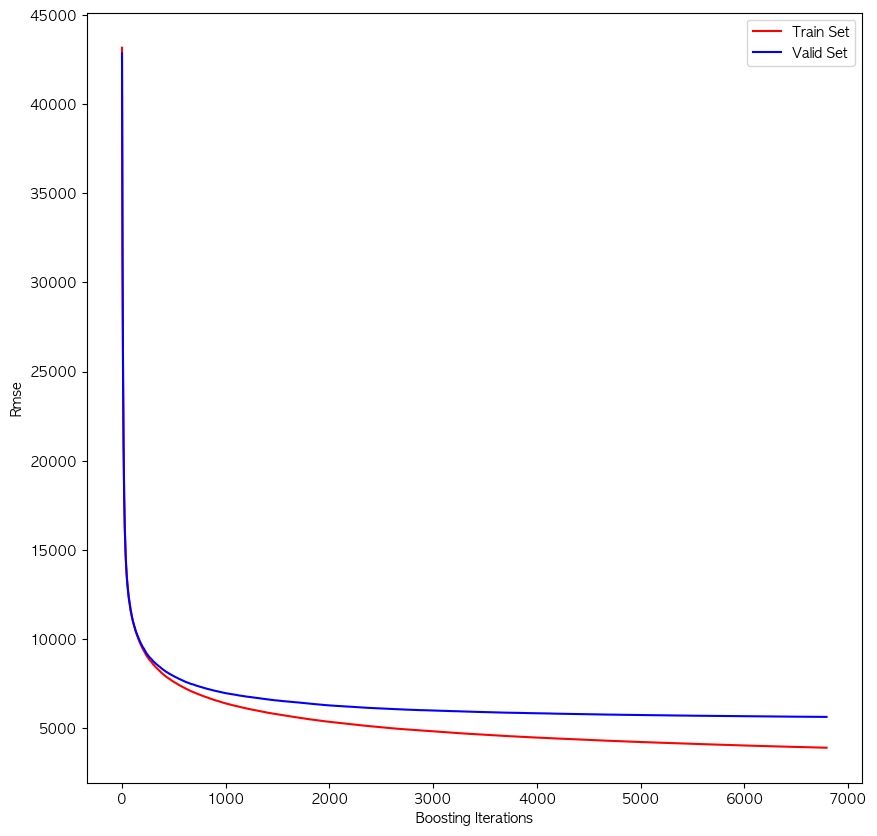

In [11]:
# 학습, 검증 rmse 시각화

plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1)
plt.plot(np.arange(len(list(model.evals_result_['training']['rmse']))), list(model.evals_result_['training']['rmse']), linestyle='-', color='r', label='Train Set')
plt.plot(np.arange(len(list(model.evals_result_['training']['rmse']))), list(model.evals_result_['valid_1']['rmse']), linestyle='-', color='b', label='Valid Set')
plt.legend()
plt.xlabel('Boosting Iterations')
plt.ylabel('Rmse')
plt.show()

In [12]:
features = ['전용면적', '층', '건축년도', '좌표X', '좌표Y', '가장 가까운 거리', '인근 지하철 역 개수',
       '가장 가까운 버스 정류장 거리', '인근 버스 정류장 개수', '계약년', 'GDP', '한국은행 기준금리',
       '기대 인플레이션', '지가지수', '아파트 인허가', '미분양', '거래량', '건설사 랭킹', '공시지가 평균',
       '매수우위지수', '건물나이', '30년이상50년이하', '구매력지수', '거래활발지수', '매매가격 지수 증감률',
       '매매 대비 전세가격 비율', '아파트 카테고리', '지하철 카테고리', '구 카테고리', '건설사 카테고리',
       '가장 가까운 다리와의 거리', '인근 다리 개수 1개이상 3개 이하', '학군', '계약월_sin']

feat_imp = model.feature_importances_

In [13]:
sorted_feat_imp = pd.Series(feat_imp, features).sort_values(ascending=False)
print(sorted_feat_imp)

전용면적                   27069
가장 가까운 버스 정류장 거리       12577
가장 가까운 거리              12266
가장 가까운 다리와의 거리         11443
좌표X                    11211
좌표Y                    10590
층                      10458
건축년도                    9729
공시지가 평균                 9207
건물나이                    8109
매매가격 지수 증감률             7152
지하철 카테고리                7092
지가지수                    7087
인근 버스 정류장 개수            6414
구매력지수                   5618
학군                      5257
인근 지하철 역 개수             5182
미분양                     4764
매매 대비 전세가격 비율           4449
거래량                     4146
거래활발지수                  3859
매수우위지수                  3496
기대 인플레이션                2851
계약월_sin                 2357
한국은행 기준금리               1757
아파트 인허가                 1686
구 카테고리                  1576
건설사 카테고리                1230
GDP                      984
계약년                      952
아파트 카테고리                 675
건설사 랭킹                   641
인근 다리 개수 1개이상 3개 이하       68
30년이상50년이하                38
dtype: int32


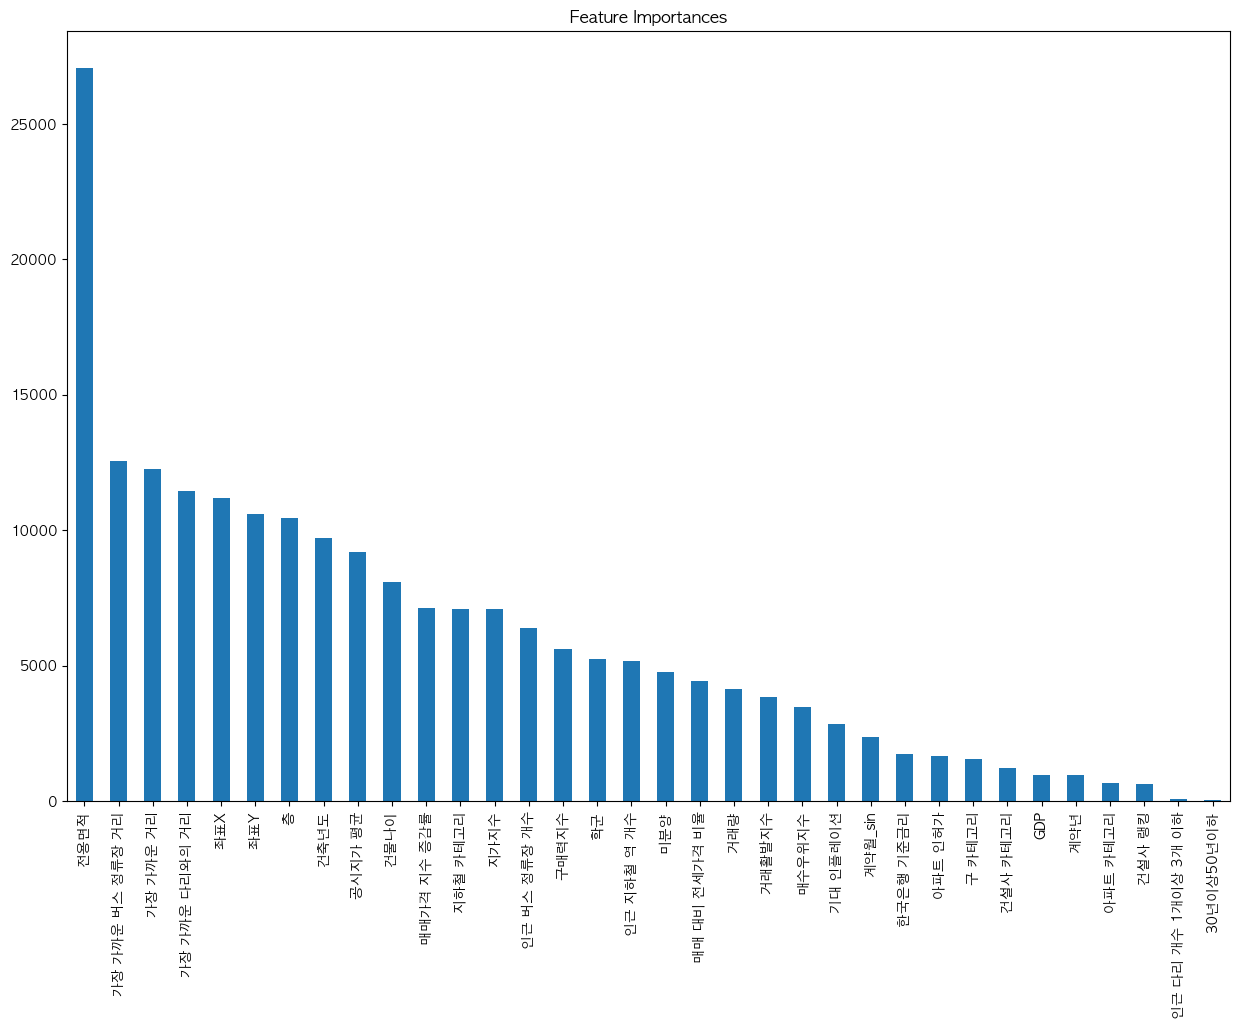

In [14]:
plt.figure(figsize=(15, 10))
sorted_feat_imp.plot(kind='bar', title='Feature Importances')
plt.show()

In [15]:
sorted_feat_imp = sorted_feat_imp / sorted_feat_imp.max()
sorted_feat_imp

전용면적                   1.000000
가장 가까운 버스 정류장 거리       0.464627
가장 가까운 거리              0.453138
가장 가까운 다리와의 거리         0.422734
좌표X                    0.414164
좌표Y                    0.391222
층                      0.386346
건축년도                   0.359415
공시지가 평균                0.340131
건물나이                   0.299568
매매가격 지수 증감률            0.264214
지하철 카테고리               0.261997
지가지수                   0.261812
인근 버스 정류장 개수           0.236950
구매력지수                  0.207544
학군                     0.194207
인근 지하철 역 개수            0.191437
미분양                    0.175995
매매 대비 전세가격 비율          0.164358
거래량                    0.153164
거래활발지수                 0.142562
매수우위지수                 0.129151
기대 인플레이션               0.105323
계약월_sin                0.087074
한국은행 기준금리              0.064908
아파트 인허가                0.062285
구 카테고리                 0.058222
건설사 카테고리               0.045439
GDP                    0.036352
계약년                    0.035169
아파트 카테고리               0.024936
건설사 랭킹  

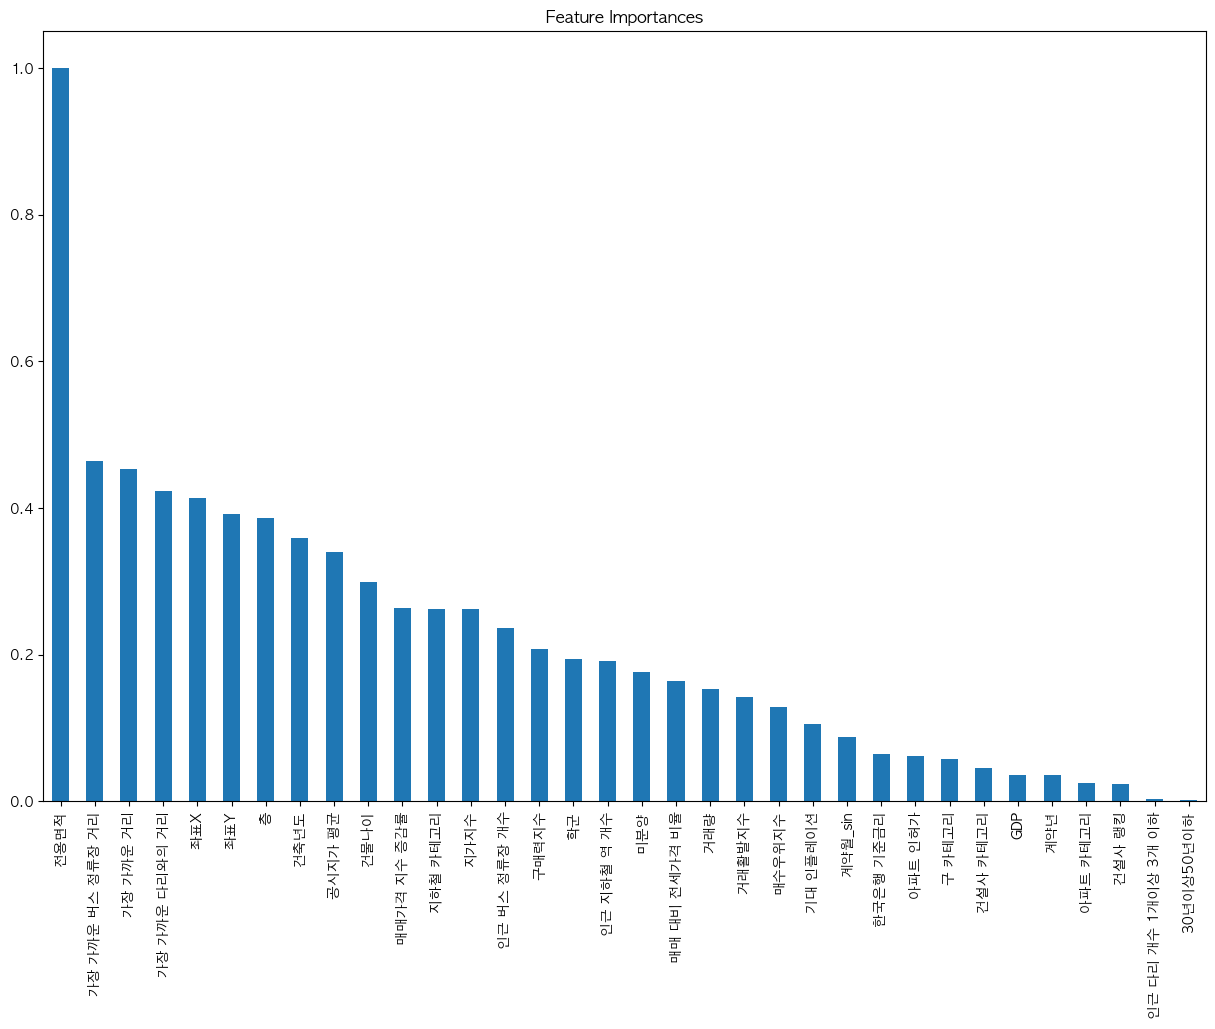

In [16]:
plt.figure(figsize=(15, 10))
sorted_feat_imp.plot(kind='bar', title='Feature Importances')
plt.show()